### Equal Interval Search
Some notes about problem, neccessary assumptions, and the equal interval search algorithem.

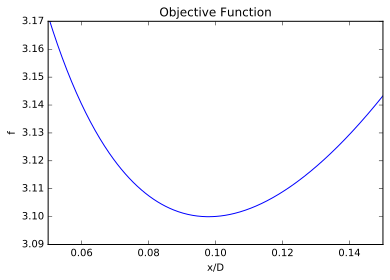

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from __future__ import division
%config InlineBackend.figure_formats=['svg']
%matplotlib inline

al = np.linspace( 0.05, 0.15, 500)
plt.plot(al, (1.11 + 1.11*al**(-0.18))/(1 - al))
plt.axis([0.05, 0.15, 3.09,3.17])
plt.title("Objective Function")
plt.ylabel("f")
plt.xlabel("x/D")
plt.show()

We can see (at least qualitatively), from the plot of the objective funtion that on the interval $0.05 < \alpha < 0.15$ the optimum value lies somewhere between 0.09 and 0.10, and the function evaluated in that range has an average value of about 3.10.  

In [1]:
#Equal Interval Search
#Erin Schmidt

#Adapted, with significant modification, from Arora et al.'s APOLLO 
#implementation found in "Introduction to Optimum Design" 1st Ed. (1989).

def func(al, count): #the objective function
    count = count + 1
    f = (1.11 + 1.11*al**(-0.18))/(1 - al)
    return f, count

def mini(au, al, count): #evaluates f at the minimum (or optimum) stationary point
    alpha = (au + al)*0.5
    (f, count) = func(alpha, count)
    return f, alpha, count

def equal(delta, epsilon, count):
    al = 0.01 #should this be zero? alpha lower bound
    (f, count) = func(al, count)
    fl = f #function value at lower bound
    #delta = 0.01 #step-size
    #au = 0.15 #alpha upper bound

    while True:
        aa = delta
        (f, count) = func(aa, count)
        fa = f
        if fa > fl:
            delta = delta * 0.1
        else:
            break
            
    while True:
        au = aa + delta
        (f, count) = func(au, count)
        fu = f
        if fa > fu:
            al = aa
            aa = au
            fl = fa
            fa = fu
        else:
            break

    while True:
        if (au - al) > epsilon: #compares interval size to convergence criteria
            delta = delta * 0.1
            aa = al #intermediate alpha
            fa = fl #intermediate alpha function value
            while True:
                au = aa + delta
                (f, count) = func(au, count)
                fu = f
                if fa > fu: 
                    al = aa
                    aa = au
                    fl = fa
                    fa = fu
                    continue
                else:
                    break
            continue
        else:
            (f, alpha, count) = mini(au, al, count)
            return f, alpha, count


#run the program
delta = 0.01
epsilon = 1E-3
count = 0

(f, alpha, count) = equal(delta, epsilon, count)
print('The minimum is at {:.4f}'.format(alpha))
print('The function value at the minimum = {:.4f}'.format(f))
print('Total number of function calls = {}'.format(count))

The minimum is at 0.0979
The function value at the minimum = 3.1000
Total number of function calls = 32


### Polynomial Approximation
Placeholder